# Question 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
red_wine = pd.read_csv("winequality-red.csv",sep=";")
white_wine = pd.read_csv("winequality-white.csv",sep=";")

Splitting the concatenated row in to 12 rows

In [ ]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Part b , Question 1

Plot between the number of samples (red wine) vs Quality

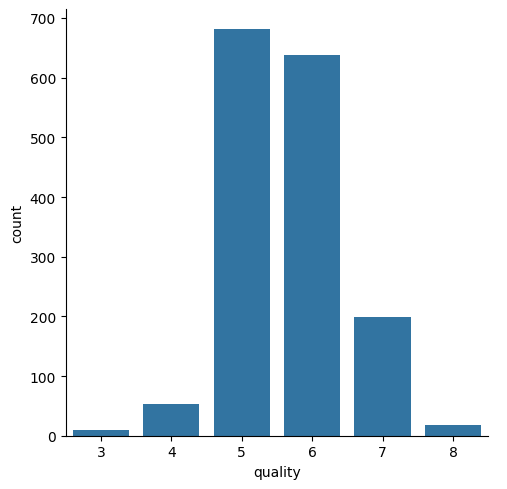

In [ ]:
sns.catplot(x = 'quality', data = red_wine , kind = 'count')

Plot between the number of samples (white wine) vs Quality

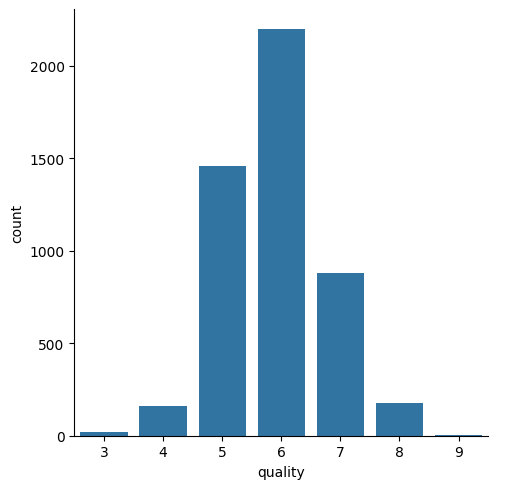

In [ ]:
sns.catplot(x = 'quality', data = white_wine , kind = 'count')

In [ ]:
correlation1 = red_wine.corr() #finding the correlation matrix for the red wine data set

<Axes: >

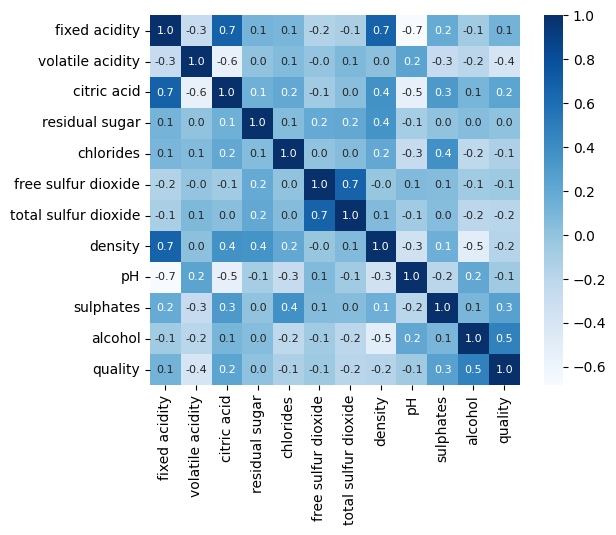

In [ ]:
sns.heatmap(correlation1, cbar = True, square = True , fmt = '.1f' , annot = True, annot_kws={'size' : 8}, cmap = 'Blues')

In [ ]:
correlation2 = white_wine.corr()  #finding the correlation matrix for white wine data set

<Axes: >

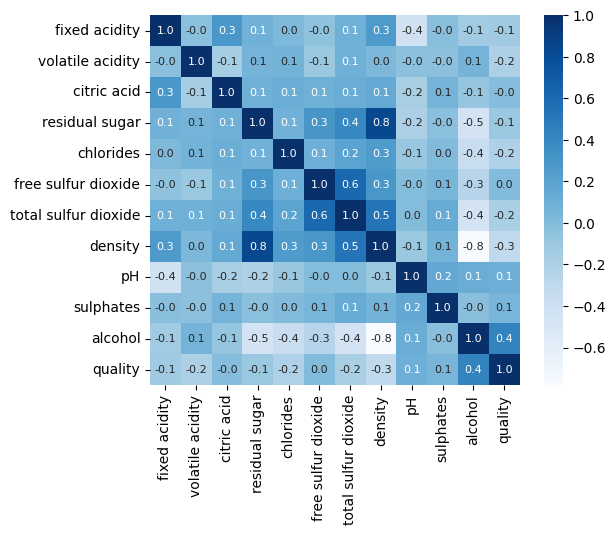

In [ ]:
sns.heatmap(correlation2, cbar = True, square = True , fmt = '.1f' , annot = True, annot_kws={'size' : 8}, cmap = 'Blues')

The above two matrices are the correlation matrices which describes the relation between each features. darker color signifies that the two features are positively correlated and the lighter color signifies that the both features are negatively correlated

# Random Forest

Training, Testing and Regrresion of red wine data set. hyperparameter in this case will be n_estimators, which determines the number of decision trees in the random forest

Random forest on red wine data sets

In [ ]:
X = red_wine.drop('quality' ,axis = 1)

In [ ]:
y = red_wine['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [80, 160, 240] }
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_samples_split': [80, 160, 240],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Test the best model on test data
y_pred = best_rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse #for red wine data set

0.3971024454337536

Training, Testing and Regrresion of white wine data set. hyperparameter in this case will be n_estimators, which determines the number of decision trees in the random forest

In [ ]:
X1 = white_wine.drop('quality' ,axis = 1)

In [ ]:
y1 = white_wine['quality']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.05, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [80, 160, 240] }
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_samples_split': [80, 160, 240],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Test the best model on test data
y_pred = best_rf_model.predict(X1_test)

In [ ]:
mse = mean_squared_error(y1_test, y_pred)

In [ ]:
mse #for white wine data set

0.44809567514211596

# SVR with RBF kernel

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [ ]:
svr_rbf = SVR(kernel='rbf')

In [ ]:
grid_search = GridSearchCV(estimator=svr_rbf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

In [ ]:
y_pred = best_svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

0.42189995245003786

For white wine

In [ ]:
svr_rbf = SVR(kernel='rbf')

In [ ]:
grid_search = GridSearchCV(estimator=svr_rbf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

In [ ]:
y_pred = best_svr_model.predict(X1_test)

In [ ]:
mse = mean_squared_error(y1_test, y_pred)

In [ ]:
mse

0.5304218373168024

Part D , question 1

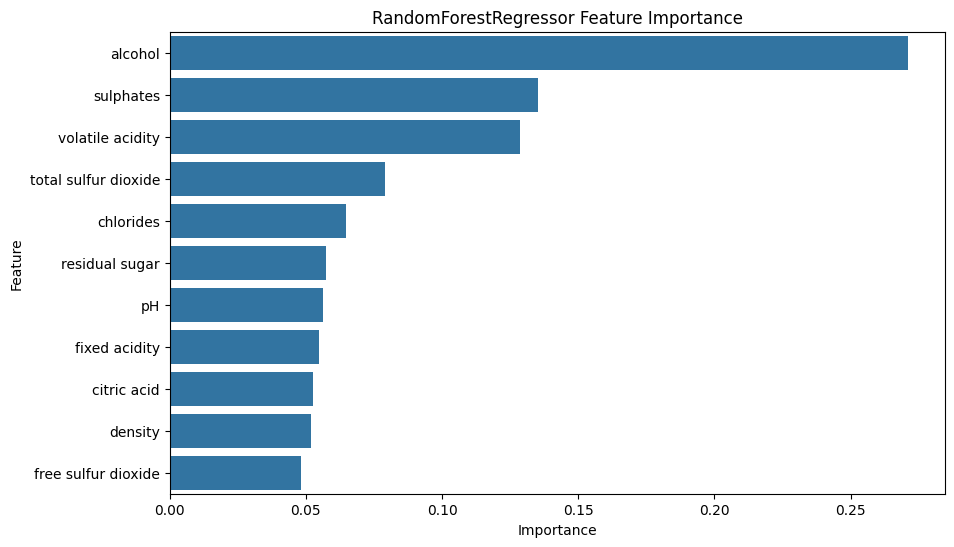

                 Feature  Importance
10               alcohol    0.270983
9              sulphates    0.135296
1       volatile acidity    0.128609
6   total sulfur dioxide    0.079179
4              chlorides    0.064858
3         residual sugar    0.057246
8                     pH    0.056122
0          fixed acidity    0.054998
2            citric acid    0.052600
7                density    0.051911
5    free sulfur dioxide    0.048198


In [ ]:
# Train the RandomForestRegressor model
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('RandomForestRegressor Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Alternatively, print feature importance values
print(feature_importance_df)


In [ ]:
X_train.shape

(1519, 11)

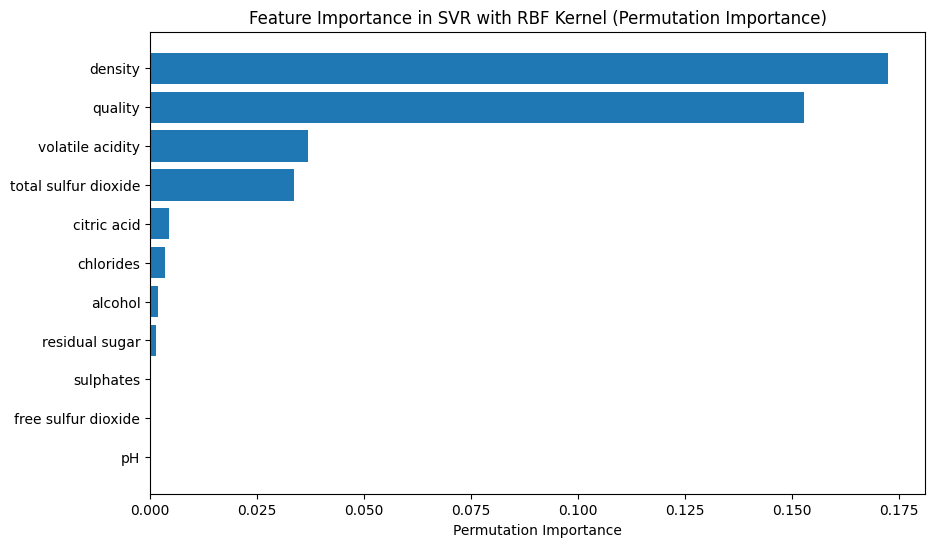

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Generate some example data
X, y = make_regression(n_samples=100, n_features=11, noise=0.1, random_state=42)

# Train SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(svr_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = [red_wine.columns[i+1] for i in range(X.shape[1])]

# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance in SVR with RBF Kernel (Permutation Importance)')
plt.show()


Part E, question 1

* Above I made four models
* Rf regressor for learning red and white data sets, SVR RBF based for learning red and white data sets.
* RF regressor has given the best performance for learning both red and white wine data sets when compared to SVR.
* But the above observations drawn from taking certain values of the variables in the model. Still we can learn more about the model and find the appropriate values of variables which may make the model to fit for other datasets.

# Question 2

In [ ]:
mice_protein = pd.read_excel("Data_Cortex_Nuclear.xls")

In [ ]:
mice_protein

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [ ]:
pd.Series(mice_protein['class']).value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [ ]:
features_with_missed_data = mice_protein.columns[mice_protein.isnull().any()].tolist()

The last four columns are not numbers. So, the imputer function doesn't work on it. So, we allote categorical values(numbers) to them, such that imputer function works.

In [ ]:
label_encoders = {}
for column in mice_protein.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    mice_protein[column] = label_encoders[column].fit_transform(mice_protein[column])

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
mice_protein_imputed = imputer.fit_transform(mice_protein)

In [ ]:
mice_protein_imputed = pd.DataFrame(mice_protein_imputed, columns=mice_protein.columns)

Visualizing the data

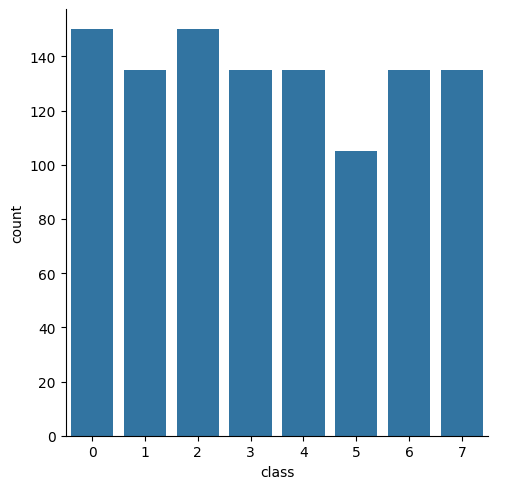

In [ ]:
sns.catplot(x = 'class', data = mice_protein , kind = 'count')

In [ ]:
correlation = mice_protein_imputed.corr() #finding the correlation matrix

<Axes: >

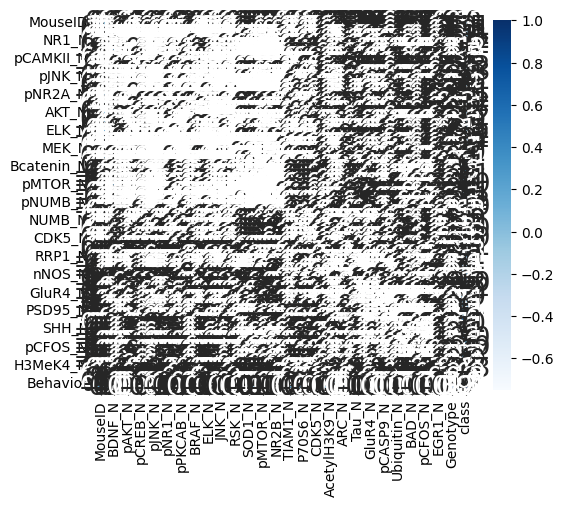

In [ ]:
sns.heatmap(correlation, cbar = True, square = True , fmt = '.1f' , annot = True, annot_kws={'size' : 19}, cmap = 'Blues')

darker color signifies that the two features are positively correlated and the lighter color signifies that the both features are negatively correlated

In [ ]:
columns_to_drop = ['Genotype','Treatment','Behavior','class']

In [ ]:
columns_to_drop

['Genotype', 'Treatment', 'Behavior', 'class']

# Random forest classifier

In [ ]:
df1 = mice_protein_imputed.drop(columns_to_drop ,axis = 1)

In [ ]:
df2 = mice_protein_imputed['class']

In [ ]:
df1_train, df1_test, df2_train, df2_test = train_test_split(df1, df2, test_size=0.005, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(df1_train, df2_train)

RandomForestClassifier(random_state=42)

In [ ]:
prediction = rf_classifier.predict(df1_test)

In [ ]:
accuracy = accuracy_score(df2_test, prediction)

In [ ]:
prediction

array([1., 3., 6., 4., 7., 4.])

In [ ]:
accuracy

1.0

# SVC RBF

In [ ]:
svc_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

In [ ]:
svc_classifier.fit(df1_train, df2_train)

SVC(random_state=42)

In [ ]:
predictions1 = svc_classifier.predict(df1_test)

In [ ]:
accuracy1 = accuracy_score(df2_test, predictions1)

In [ ]:
accuracy1

0.16666666666666666

Part D

In [ ]:
estimator = LogisticRegression(max_iter=1000)

In [ ]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [ ]:
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

In [ ]:
rfecv.fit(df1_scaled, df2)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

In [ ]:
selected_features = rfecv.support_

In [ ]:
df1_selected = df1_scaled[:, selected_features]

In [ ]:
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(df1_selected, df2)

RandomForestClassifier(random_state=42)

In [ ]:
cv_scores_selected_rf = cross_val_score(rf_classifier_selected, df1_selected, df2, cv=5)
mean_cv_score_selected_rf = cv_scores_selected_rf.mean()

In [ ]:
print("Mean CV Score with Selected Features (Random Forest):", mean_cv_score_selected_rf)

Mean CV Score with Selected Features (Random Forest): 0.6194444444444445


In [ ]:
print("Mean CV Score with All Features (before feature elimination):", rfecv.cv_results_['mean_test_score'].max())

Mean CV Score with All Features (before feature elimination): 0.7138888888888889


In [ ]:
svc_classifier_selected = SVC(kernel='rbf', gamma='scale', random_state=42)
svc_classifier.fit(df1_selected, df2)

SVC(random_state=42)

In [ ]:
cv_scores_selected_svc = cross_val_score(svc_classifier_selected, df1_selected, df2, cv=5)
mean_cv_score_selected_svc = cv_scores_selected_svc.mean()

In [ ]:
print("Mean CV Score with Selected Features (SVC):", mean_cv_score_selected_svc)

Mean CV Score with Selected Features (SVC): 0.687962962962963


# Question 3

Part a

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/hymenoptera_data.zip'  # Update with the path to your zip file

# Directory to extract the contents to
extract_to_directory = '/content'  # You can change this to your desired directory

# Create the directory if it doesn't exist
#!mkdir -p "{extract_to_directory}"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Zip file extracted successfully to:", extract_to_directory)

Zip file extracted successfully to: /content


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "/content/hymenoptera_data"


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


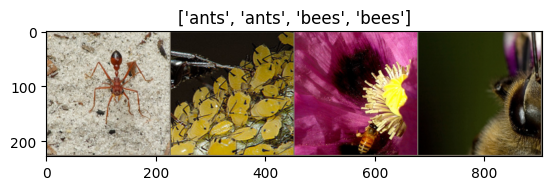

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train the model
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 95.7MB/s]


Epoch 0/24
----------
train Loss: 0.6863 Acc: 0.6352
val Loss: 0.2844 Acc: 0.8954

Epoch 1/24
----------
train Loss: 0.5606 Acc: 0.7582
val Loss: 0.7561 Acc: 0.6993

Epoch 2/24
----------
train Loss: 0.6549 Acc: 0.7541
val Loss: 0.1962 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.5352 Acc: 0.7705
val Loss: 0.2048 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.3823 Acc: 0.8238
val Loss: 0.3539 Acc: 0.8758

Epoch 5/24
----------
train Loss: 0.4446 Acc: 0.8074
val Loss: 0.2259 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.4392 Acc: 0.7828
val Loss: 0.1841 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.3528 Acc: 0.8402
val Loss: 0.1877 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3521 Acc: 0.8525
val Loss: 0.1783 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3467 Acc: 0.8443
val Loss: 0.1730 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3586 Acc: 0.8320
val Loss: 0.2034 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3662 Acc: 0.8689
val Loss: 0.1937 Acc: 0.9412

Ep

In [ ]:
def extract_resnet_features(model, dataloader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, batch_labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.extend(outputs.cpu().numpy())
            labels.extend(batch_labels.cpu().numpy())
    return np.array(features), np.array(labels)

# Assuming dataloader for training images is available
train_features, train_labels = extract_resnet_features(model_conv, dataloaders['train'])


In [ ]:
train_features.shape, train_labels.shape

((244, 2), (244,))

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

def extract_resnet18_features(image_path):
    # Load pre-trained ResNet-18 model
    model = models.resnet18(pretrained=True)
    # Remove the last fully connected layer
    model = torch.nn.Sequential(*list(model.children())[:-1])
    # Set model to evaluation mode
    model.eval()

    # Define image transformations
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load and preprocess the input image
    input_image = Image.open(image_path)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

    # Perform forward pass to get features
    with torch.no_grad():
        features = model(input_batch)

    # Flatten the features
    features = features.squeeze().numpy()

    return features

# Example usage:
image_path = '/content/hymenoptera_data/val/ants/1053149811_f62a3410d3.jpg'
features = extract_resnet18_features(image_path)
print(features.shape)  # Output should be Nx512


(512,)


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np
from PIL import Image

def extract_resnet18_features(dataset):
    # Load pre-trained ResNet-18 model
    model = models.resnet18(pretrained=True)
    # Remove the last fully connected layer
    model = torch.nn.Sequential(*list(model.children())[:-1])
    # Set model to evaluation mode
    model.eval()

    # Define image transformations
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    features = []
    labels = []

    # Iterate over the dataset
    for image, label in dataset:
        # Convert image to PIL Image
        image = transforms.ToPILImage()(image)
        # Preprocess the input image
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

        # Perform forward pass to get features
        with torch.no_grad():
            feature = model(input_batch)

        # Flatten the features and append to the list
        feature = feature.squeeze().numpy()
        features.append(feature)
        labels.append(label)

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    return features

# Example usage:
# Assuming val_dataset is your validation dataset
# val_dataset = datasets.ImageFolder('path/to/your/validation/dataset', transform=transforms.ToTensor())
#val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
val_features = extract_resnet18_features(image_datasets['train'])
print(val_features.shape)  # Output should be Nx512


(244, 512)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define parameter grids for SVM
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.1, 0.01, 0.001, 0.0001]}

# Define parameter grids for Random Forest
rf_param_grid = {'n_estimators': [10, 50, 100],
                 'max_depth': [None, 10, 20, 30]}

# SVM
svm_model = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5)
svm_model.fit(train_features, train_labels)
svm_best_model = svm_model.best_estimator_

# Random Forest
rf_model = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_model.fit(train_features, train_labels)
rf_best_model = rf_model.best_estimator_

# Test data
test_features, test_labels = extract_resnet_features(model_conv, dataloaders['val'])

# SVM evaluation
svm_preds = svm_best_model.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_preds)
svm_f1 = f1_score(test_labels, svm_preds)

# Random Forest evaluation
rf_preds = rf_best_model.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_preds)
rf_f1 = f1_score(test_labels, rf_preds)

print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


SVM Accuracy: 0.9607843137254902
SVM F1 Score: 0.963855421686747
Random Forest Accuracy: 0.9411764705882353
Random Forest F1 Score: 0.9447852760736196


References:
* https://youtu.be/WLwjvWq0GWA?si=yHFS6PAVPO3eQqtx
* https://youtu.be/CBxJuwrGrc4?si=N3RWBfl2Rsm42GsE
* chatgpt
* google